In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from macrohet import visualise, dataio, tile
from tqdm.auto import tqdm
import os
import json
import napari
import matplotlib as mpl
# Function to calculate gradient for a window
def calculate_gradient(window):
    y = window
    x = np.arange(len(window))
    slope, _ = np.polyfit(x, y, 1)
    return slope

### Set style for plotting

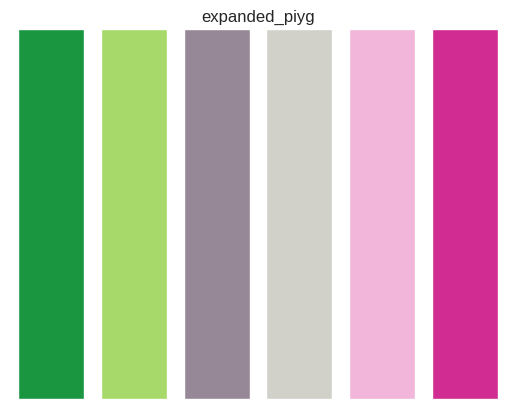

['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91']


In [2]:
sns.set(style = 'white')

# Set the default font to Helvetica
mpl.rcParams['font.family'] = 'Liberation Sans'

# Get the color palette of the PiYG color map
expanded_piyg = visualise.color_palette('expanded_piyg').colors

sns.set_palette(expanded_piyg)

# Display the colors in the PiYG color map
visualise.show_colors('expanded_piyg')
print(expanded_piyg)

### Set output folder

In [3]:
output_dir = '/mnt/DATA/macrohet/results/preliminary_sc_measures/cumulative_sc_plots/thresholded_480/'#'/Users/dayn/data/macrohet_mac/temp_results/'
os.makedirs(output_dir, exist_ok = True)

### Load sc df

In [4]:
df = pd.read_pickle('/mnt/DATA/macrohet/results/preliminary_sc_measures/sc_dfs/sc_df_GT_70_interp.pkl')
df['dMtb'] = df['delta Mtb max fold-change normalised max area']
df['Mtb'] = df['Intracellular thresholded Mtb content smooth']
# Assuming your DataFrame is named 'df'
df['Strain/Compound'] = df['Compound']  # Create a new column and copy values from 'Compound'
# Replace values in 'NewColumn' where 'Strain' is 'RD1' with 'RD1'
df.loc[df['Strain'] == 'RD1', 'Strain/Compound'] = 'RD1'
df

,Time (hours),x,y,x scaled,y scaled,Infection status,Initial infection status,Final infection status,Area,Intracellular mean Mtb content,...,Strain,Compound,Concentration,Technical replicate,Cell ID,Acquisition ID,Unique ID,dMtb,Mtb,Strain/Compound
0,0,457.172943,8.791715,2304.151633,44.310242,1.0,1.0,0.0,20542.0,343.157196,...,RD1,CTRL,EC0,1,426,"(3, 4)",426.3.4,0.000586,0.912650,RD1
1,1,459.138947,6.718642,2314.060291,33.861954,0.0,1.0,0.0,16683.0,344.687042,...,RD1,CTRL,EC0,1,426,"(3, 4)",426.3.4,0.000586,0.912650,RD1
2,2,460.555237,10.785886,2321.198394,54.360864,0.0,1.0,0.0,18935.0,343.875061,...,RD1,CTRL,EC0,1,426,"(3, 4)",426.3.4,0.000586,0.912650,RD1
3,3,455.878815,11.143067,2297.629226,56.161059,1.0,1.0,0.0,19937.0,345.565796,...,RD1,CTRL,EC0,1,426,"(3, 4)",426.3.4,0.000586,0.912650,RD1
4,4,462.634186,14.050420,2331.676296,70.814116,1.0,1.0,0.0,21793.0,350.585083,...,RD1,CTRL,EC0,1,426,"(3, 4)",426.3.4,0.000586,0.912650,RD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296992,70,628.562500,1099.782104,3167.955000,5542.901807,1.0,0.0,1.0,101991.0,377.731873,...,WT,BDQ,EC99,2,935,"(6, 9)",935.6.9,0.000030,5.031497,BDQ
296993,71,628.463684,1102.144409,3167.456968,5554.807822,1.0,0.0,1.0,100978.0,377.812103,...,WT,BDQ,EC99,2,935,"(6, 9)",935.6.9,0.000030,5.274554,BDQ
296994,72,628.672058,1101.594727,3168.507173,5552.037422,1.0,0.0,1.0,108397.0,376.812805,...,WT,BDQ,EC99,2,935,"(6, 9)",935.6.9,0.000030,5.220153,BDQ
296995,73,630.372803,1102.817749,3177.078926,5558.201455,1.0,0.0,1.0,107079.0,377.437073,...,WT,BDQ,EC99,2,935,"(6, 9)",935.6.9,0.000030,5.002094,BDQ


### Calculate the maximum gradient for each cell

In [5]:
# df['Max. dMtb gradient'] = np.nan  # Initialize with NaN instead of None
for unique_ID in tqdm(df['Unique ID'].unique()):
    sc_df = df[df['Unique ID'] == unique_ID]

    max_gradient = sc_df['Mtb'].rolling(window=15).apply(calculate_gradient, raw=True).max()
    df.loc[df['Unique ID'] == unique_ID, 'Max. dMtb gradient'] = max_gradient
    if max_gradient > 120:
        print(unique_ID)

  0%|          | 0/3988 [00:00<?, ?it/s]

280.3.5
85.4.5


### Isolate the top ten fastest growers

In [6]:
top_ten_tracks = df.groupby('Unique ID')['Max. dMtb gradient'].max().sort_values(ascending=False).head(10)

## Plot these outliers

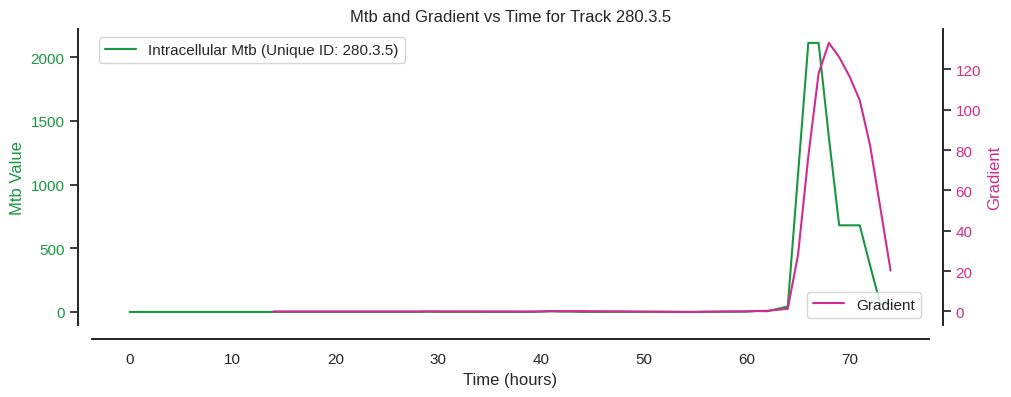

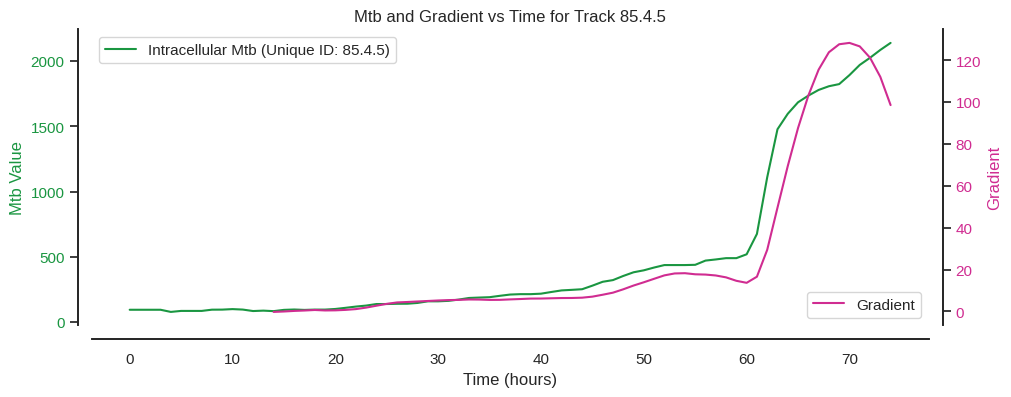

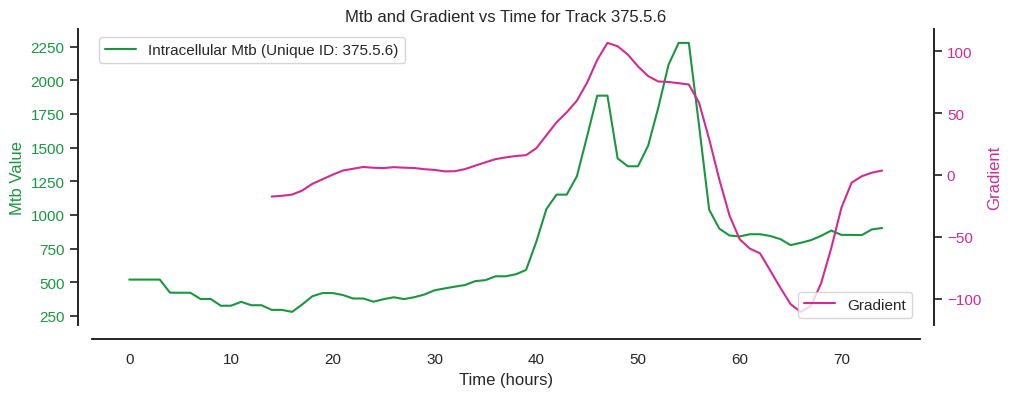

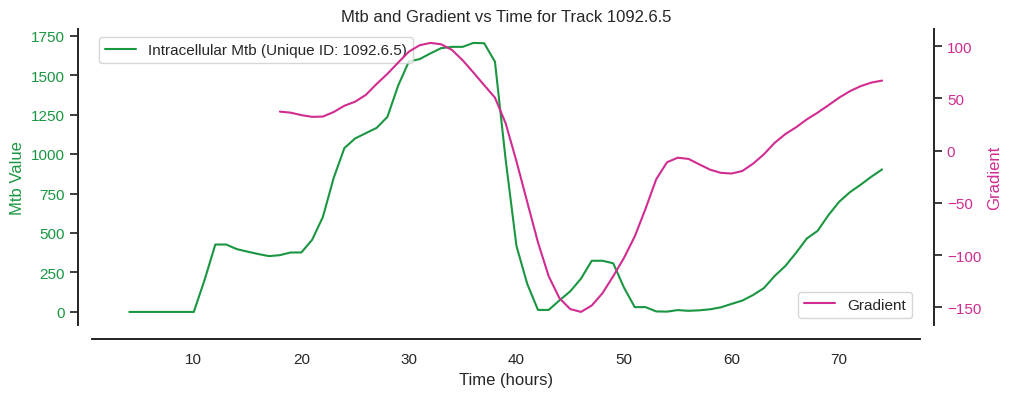

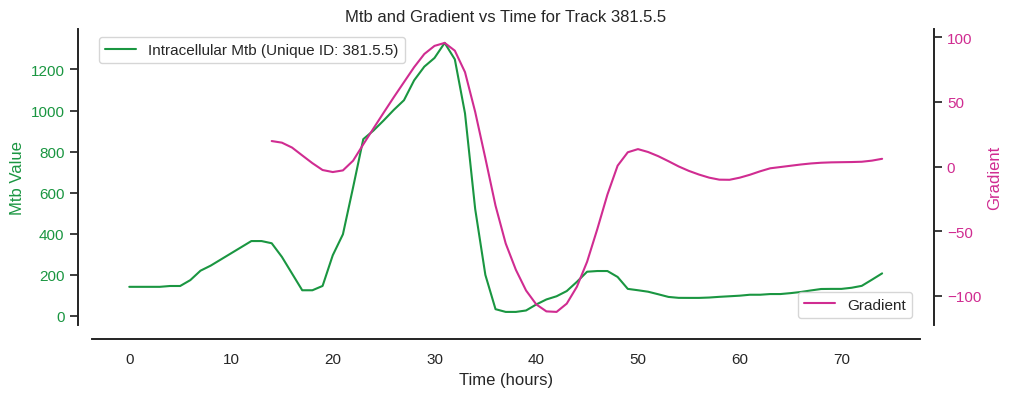

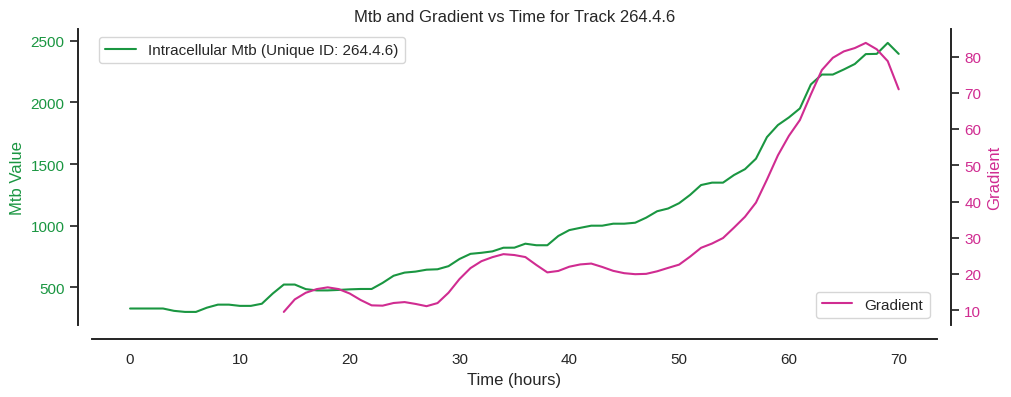

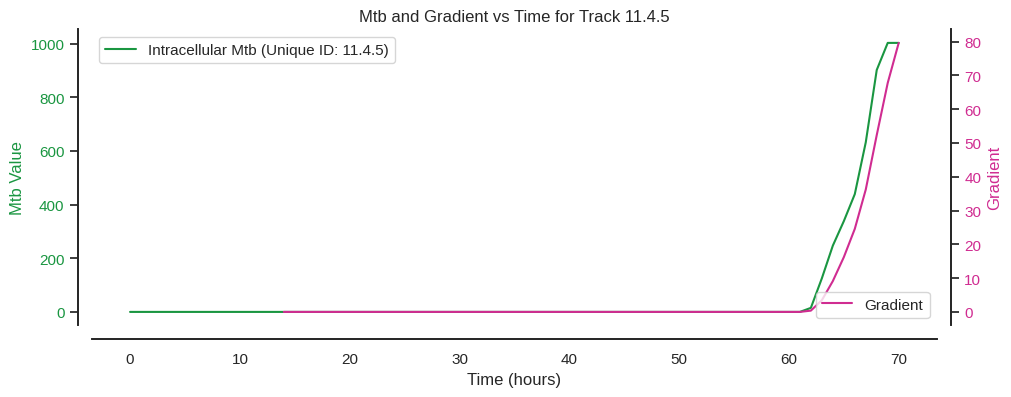

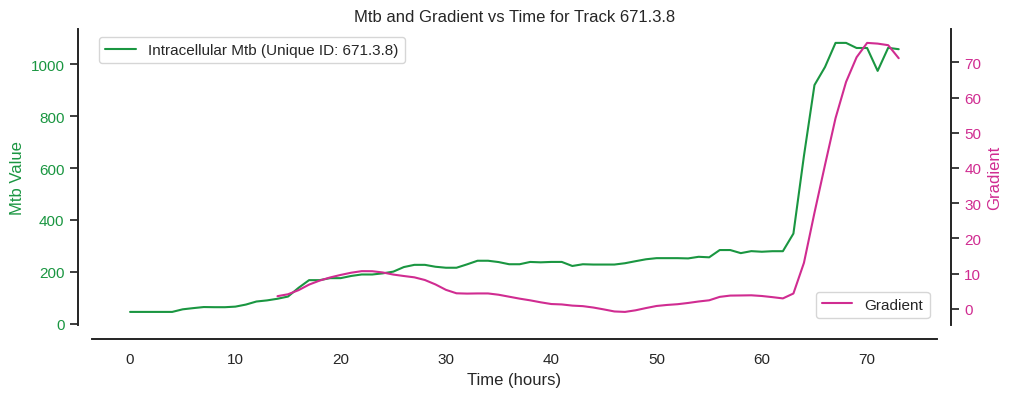

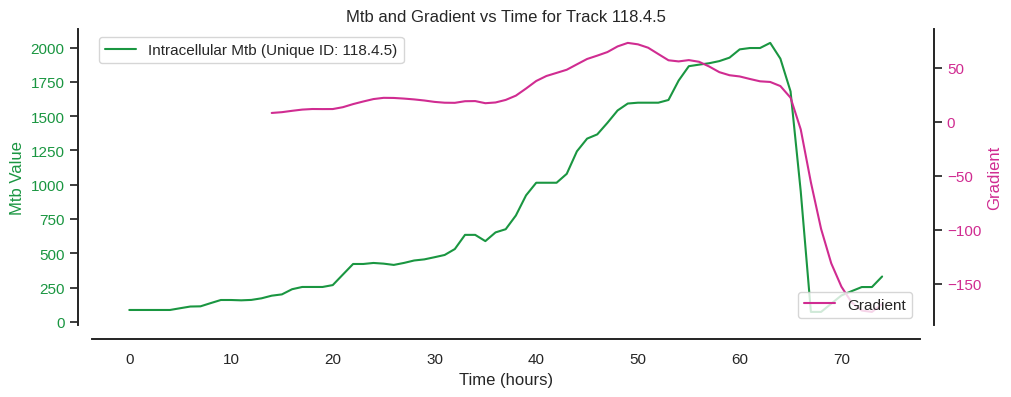

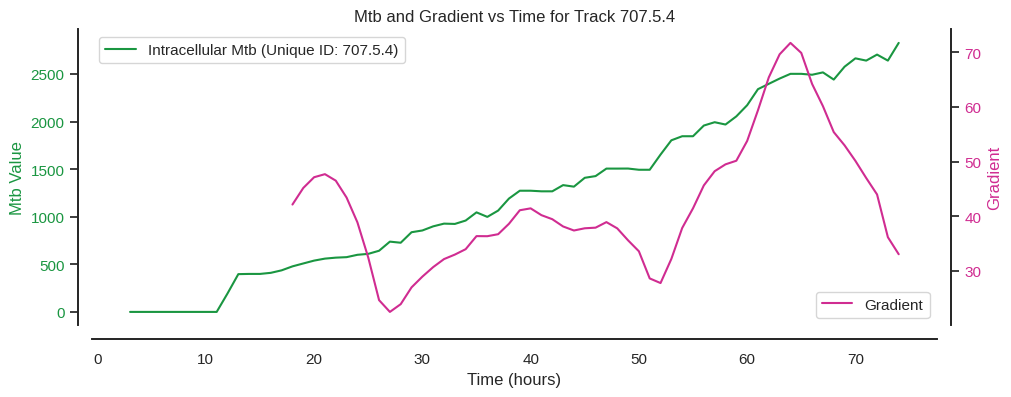

In [60]:
# Plot 'Mtb' and the calculated gradient against 'Time (hours)' for each of the top ten tracks
for track_id in top_ten_tracks.keys():
    # Extract rows corresponding to the current track
    track_data = df[df['Unique ID'] == track_id]

    # Convert to NumPy array for compatibility
    time_values = track_data['Time (hours)'].values
    mtb_values = track_data['Mtb'].values
    gradient_values = track_data['Mtb'].rolling(window=15).apply(calculate_gradient, raw=True).values

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 4))

    # Plot Mtb values
    color = expanded_piyg[0]
    ax1.set_xlabel('Time (hours)')
    ax1.set_ylabel('Mtb Value', color=color)
    ax1.plot(time_values, mtb_values, label=f'Intracellular Mtb (Unique ID: {track_id})', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a twin axis for the gradient
    ax2 = ax1.twinx() 
    color = expanded_piyg[-1]
    ax2.set_ylabel('Gradient', color=color)  
    ax2.plot(time_values, gradient_values, label='Gradient', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')

    plt.title(f'Mtb and Gradient vs Time for Track {track_id}')
    fig.tight_layout()
    sns.despine(offset = 10, right = False)
    plt.show()

### What do these cells look like?

In [21]:
base_dir = '/mnt/DATA/macrohet/'
metadata_path = os.path.join(base_dir, 'macrohet_images/PS0000/Assaylayout/20210602_Live_cell_IPSDMGFP_ATB.xml')
assay_layout = dataio.read_harmony_metadata(metadata_path, assay_layout=True,)# mask_exist=True,  image_dir = image_dir, image_metadata = metadata)
assay_layout

Reading metadata XML file...
Extracting metadata complete!


Strain Compound Concentration ConcentrationEC
Row Column                                              
3   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA            60            EC50
    7          WT      RIF           0.1            EC50
    8          WT      INH          0.04            EC50
    9          WT      BDQ          0.02            EC50
4   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA            60            EC50
    7          WT      RIF           0.1            EC50
    8          WT      INH          0.04            EC50
    9          WT      BDQ          0.02            EC50
5   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA           400            EC99
    7          WT      RIF             2            EC99
    8          WT      INH             2            EC99
    9          WT      BDQ           2.5            EC99
6   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA           400            EC99
    7          WT      RIF             2            EC99
    8          WT      INH             2            EC99
    9          WT      BDQ           2.5            EC99

In [22]:
base_dir = '/mnt/DATA/macrohet/macrohet_images/PS0000/'
metadata_fn = os.path.join(base_dir, 'Images/Index.idx.xml')
metadata = dataio.read_harmony_metadata(metadata_fn)  
metadata

Reading metadata XML file...


Extracting HarmonyV5 metadata:   0%|          | 0/113400 [00:00<?, ?it/s]

Extracting metadata complete!


,id,State,URL,Row,Col,FieldID,PlaneID,TimepointID,ChannelID,FlimID,...,PositionZ,AbsPositionZ,MeasurementTimeOffset,AbsTime,MainExcitationWavelength,MainEmissionWavelength,ObjectiveMagnification,ObjectiveNA,ExposureTime,OrientationMatrix
0,0303K1F1P1R1,Ok,r03c03f01p01-ch1sk1fk1fl1.tiff,3,3,1,1,0,1,1,...,0,0.135583505,0,2021-04-16T19:09:33.84+01:00,488,522,40,1.1,0.1,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
1,0303K1F1P1R2,Ok,r03c03f01p01-ch2sk1fk1fl1.tiff,3,3,1,1,0,2,1,...,0,0.135583505,0,2021-04-16T19:09:33.84+01:00,640,706,40,1.1,0.2,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
2,0303K1F1P2R1,Ok,r03c03f01p02-ch1sk1fk1fl1.tiff,3,3,1,2,0,1,1,...,2E-06,0.135585502,0,2021-04-16T19:09:34.12+01:00,488,522,40,1.1,0.1,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
3,0303K1F1P2R2,Ok,r03c03f01p02-ch2sk1fk1fl1.tiff,3,3,1,2,0,2,1,...,2E-06,0.135585502,0,2021-04-16T19:09:34.12+01:00,640,706,40,1.1,0.2,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
4,0303K1F1P3R1,Ok,r03c03f01p03-ch1sk1fk1fl1.tiff,3,3,1,3,0,1,1,...,4E-06,0.135587499,0,2021-04-16T19:09:34.4+01:00,488,522,40,1.1,0.1,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113395,0609K75F9P1R2,Ok,r06c09f09p01-ch2sk75fk1fl1.tiff,6,9,9,1,74,2,1,...,0,0.135533601,266399.61,2021-04-19T21:14:19.477+01:00,640,706,40,1.1,0.2,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
113396,0609K75F9P2R1,Ok,r06c09f09p02-ch1sk75fk1fl1.tiff,6,9,9,2,74,1,1,...,2E-06,0.135535598,266399.61,2021-04-19T21:14:19.757+01:00,488,522,40,1.1,0.1,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
113397,0609K75F9P2R2,Ok,r06c09f09p02-ch2sk75fk1fl1.tiff,6,9,9,2,74,2,1,...,2E-06,0.135535598,266399.61,2021-04-19T21:14:19.757+01:00,640,706,40,1.1,0.2,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
113398,0609K75F9P3R1,Ok,r06c09f09p03-ch1sk75fk1fl1.tiff,6,9,9,3,74,1,1,...,4E-06,0.135537595,266399.61,2021-04-19T21:14:20.037+01:00,488,522,40,1.1,0.1,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."


In [90]:
glimpse_dict = {}
for track_id in tqdm(top_ten_tracks.keys(), total = len(top_ten_tracks.keys())):
    # isolate sc_df
    sc_df = df[df['Unique ID'] == track_id]
    # get acq ID and ID from track id'
    acq_ID = sc_df['Acquisition ID'].iloc[0]
    cell_ID = sc_df['Cell ID'].iloc[0]
    # get images 
    row, column = acq_ID
    image_dir = os.path.join(base_dir, 'Images')
    images = tile.compile_mosaic(image_dir, 
                                 metadata, 
                                 row, column, 
                                 set_plane='max_proj',
                                 # set_channel=1,
                                 # set_time = 1,
    #                             input_transforms = [input_transforms]
                                )#.compute().compute()
    glimpse = visualise.create_glimpse_from_sc_df(sc_df, acq_ID, cell_ID, images)
    loaded_glimpse = glimpse.compute().compute()
    glimpse_dict[track_id] = loaded_glimpse
    viewer.add_image(loaded_glimpse, channel_axis=0, name = track_id, colormap=['green', 'magenta'])

  0%|          | 0/10 [00:00<?, ?it/s]

INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (3, 5, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((3, 5), 280):   0%|          | 0/74 [00:00<?, ?it/s]

INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (4, 5, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((4, 5), 85):   0%|          | 0/75 [00:00<?, ?it/s]

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/dask/array/core.py:1759: PerformanceWarning: Increasing number of chunks by factor of 21
  return da_func(*args, **kwargs)
INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (5, 6, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((5, 6), 375):   0%|          | 0/75 [00:00<?, ?it/s]

INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (6, 5, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((6, 5), 1092):   0%|          | 0/71 [00:00<?, ?it/s]

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/dask/array/core.py:1759: PerformanceWarning: Increasing number of chunks by factor of 23
  return da_func(*args, **kwargs)
INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (5, 5, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((5, 5), 381):   0%|          | 0/75 [00:00<?, ?it/s]

INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (4, 6, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((4, 6), 264):   0%|          | 0/71 [00:00<?, ?it/s]

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/dask/array/core.py:1759: PerformanceWarning: Increasing number of chunks by factor of 23
  return da_func(*args, **kwargs)
INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (4, 5, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((4, 5), 11):   0%|          | 0/71 [00:00<?, ?it/s]

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/dask/array/core.py:1759: PerformanceWarning: Increasing number of chunks by factor of 26
  return da_func(*args, **kwargs)
INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (3, 8, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((3, 8), 671):   0%|          | 0/74 [00:00<?, ?it/s]

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/dask/array/core.py:1759: PerformanceWarning: Increasing number of chunks by factor of 31
  return da_func(*args, **kwargs)
INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (4, 5, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((4, 5), 118):   0%|          | 0/75 [00:00<?, ?it/s]

INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (5, 4, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((5, 4), 707):   0%|          | 0/71 [00:00<?, ?it/s]

In [97]:
glimpse

dask.array<stack, shape=(2, 71, 500, 500), dtype=uint16, chunksize=(2, 1, 500, 500), chunktype=numpy.ndarray>

In [12]:
viewer = napari.Viewer()
for track_id in glimpse_dict.keys():
    viewer.add_image(glimpse_dict[track_id], channel_axis=0, name = track_id, colormap=['green', 'magenta'])

### Backup

In [16]:
# Directory to save images
directory = "./outliers/"

In [99]:
# Assuming your dictionary is named 'images_dict' with keys as identifiers
# and the values are PIL Image objects
images_dict = glimpse_dict  # Your dictionary of images

# Directory to save images
directory = "./outliers/"

# Dictionary to hold image filenames with the same keys
filenames_dict = {}

for key, img in images_dict.items():
    # Construct a filename for each image
    filename = f"{directory}{key}.npy"
    
    # Save the image
    np.save(filename, img)

    # Store the filename in the dictionary
    filenames_dict[key] = filename

# Save filenames dictionary as a JSON file
with open("image_filenames.json", "w") as file:
    json.dump(filenames_dict, file)


In [10]:
# Load the filenames dictionary from the JSON file
with open("image_filenames.json", "r") as file:
    filenames_dict = json.load(file)

# Dictionary to store loaded images
loaded_images_dict = {}

# Load each image using the filenames dictionary
for key, filename in filenames_dict.items():
    loaded_images_dict[key] = np.load(filename)


In [11]:
glimpse_dict = loaded_images_dict

### More outliers

In [31]:
135/0.075

1800.0

In [34]:
N = 100
top_N_tracks = df.groupby('Unique ID')['Max. dMtb gradient'].max().sort_values(ascending=False).head(N)

## Plot these outliers

  0%|          | 0/100 [00:00<?, ?it/s]

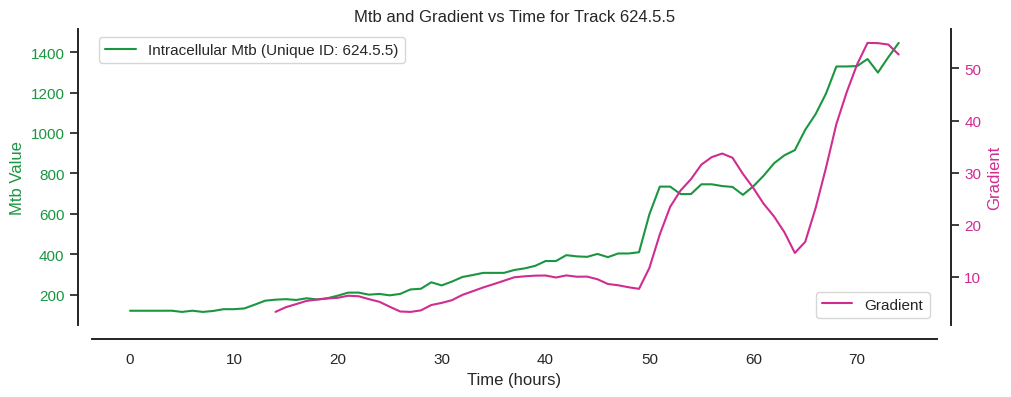

INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (5, 5, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((5, 5), 624):   0%|          | 0/75 [00:00<?, ?it/s]

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/dask/array/core.py:1759: PerformanceWarning: Increasing number of chunks by factor of 27
  return da_func(*args, **kwargs)


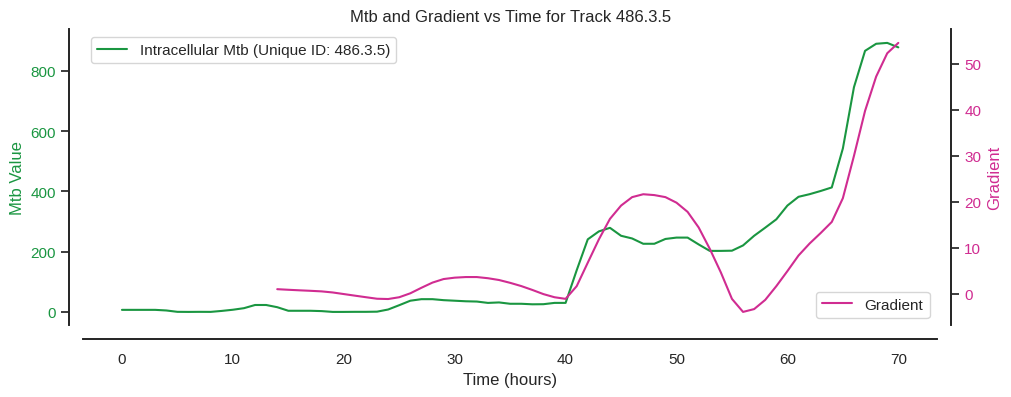

INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (3, 5, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((3, 5), 486):   0%|          | 0/71 [00:00<?, ?it/s]

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/dask/array/core.py:1759: PerformanceWarning: Increasing number of chunks by factor of 17
  return da_func(*args, **kwargs)


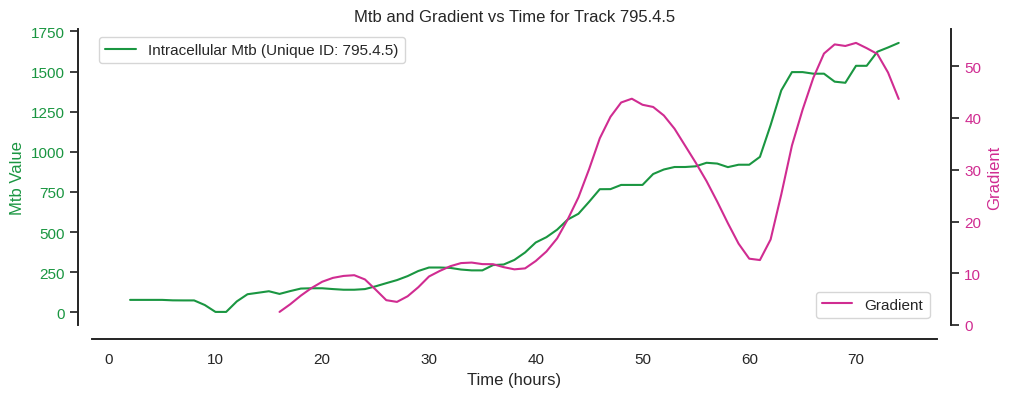

INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (4, 5, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((4, 5), 795):   0%|          | 0/73 [00:00<?, ?it/s]

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/dask/array/core.py:1759: PerformanceWarning: Increasing number of chunks by factor of 493
  return da_func(*args, **kwargs)


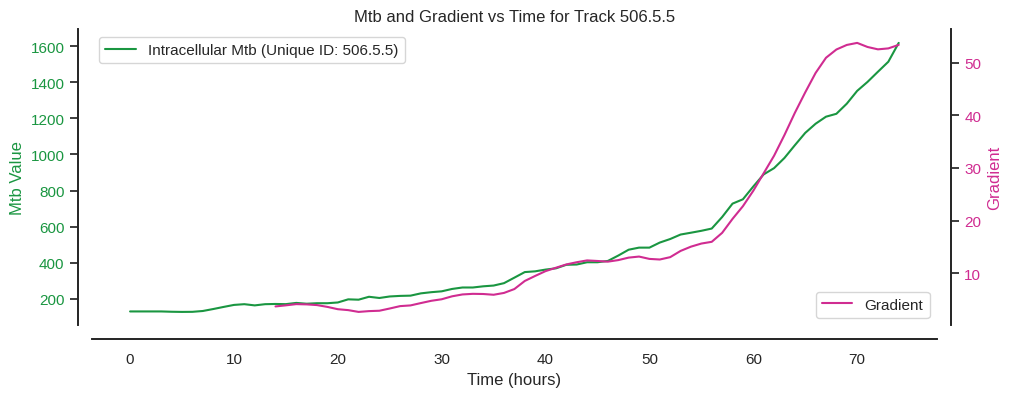

INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (5, 5, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/450 [00:00<?, ?it/s]

Creating glimpse ID: ((5, 5), 506):   0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
# previously calculated top N tracks, do not plot or load glimpse again
previous_N = 20
# Plot 'Mtb' and the calculated gradient against 'Time (hours)' for each of the top ten tracks
for n, track_id in tqdm(enumerate(top_N_tracks.keys()), total = len(top_N_tracks.keys())):
    
    if n < previous_N:
        continue
    # Extract rows corresponding to the current track
    track_data = df[df['Unique ID'] == track_id]

    # Convert to NumPy array for compatibility
    time_values = track_data['Time (hours)'].values
    mtb_values = track_data['Mtb'].values
    gradient_values = track_data['Mtb'].rolling(window=15).apply(calculate_gradient, raw=True).values

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 4))

    # Plot Mtb values
    color = expanded_piyg[0]
    ax1.set_xlabel('Time (hours)')
    ax1.set_ylabel('Mtb Value', color=color)
    ax1.plot(time_values, mtb_values, label=f'Intracellular Mtb (Unique ID: {track_id})', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a twin axis for the gradient
    ax2 = ax1.twinx() 
    color = expanded_piyg[-1]
    ax2.set_ylabel('Gradient', color=color)  
    ax2.plot(time_values, gradient_values, label='Gradient', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')

    plt.title(f'Mtb and Gradient vs Time for Track {track_id}')
    fig.tight_layout()
    sns.despine(offset = 10, right = False)
    plt.show()

    # get acq ID and ID from track id'
    acq_ID = track_data['Acquisition ID'].iloc[0]
    cell_ID = track_data['Cell ID'].iloc[0]
    # get images 
    row, column = acq_ID
    image_dir = os.path.join(base_dir, 'Images')
    images = tile.compile_mosaic(image_dir, 
                                 metadata, 
                                 row, column, 
                                 set_plane='max_proj',
                                 # set_channel=1,
                                 # set_time = 1,
    #                             input_transforms = [input_transforms]
                                )#.compute().compute()
    glimpse = visualise.create_glimpse_from_sc_df(track_data, acq_ID, cell_ID, images)
    loaded_glimpse = glimpse.compute().compute()
    glimpse_dict[track_id] = loaded_glimpse

    filename = f"{directory}{track_id}.npy"
    
    # Save the image
    np.save(filename, loaded_glimpse)

    # Store the filename in the dictionary
    filenames_dict[key] = filename

In [24]:
len(glimpse_dict)

15

In [30]:
for n, track_id in enumerate(glimpse_dict.keys()):
    if n < previous_N:
        continue
    viewer.add_image(glimpse_dict[track_id], channel_axis=0, name = track_id, colormap=['green', 'magenta'])